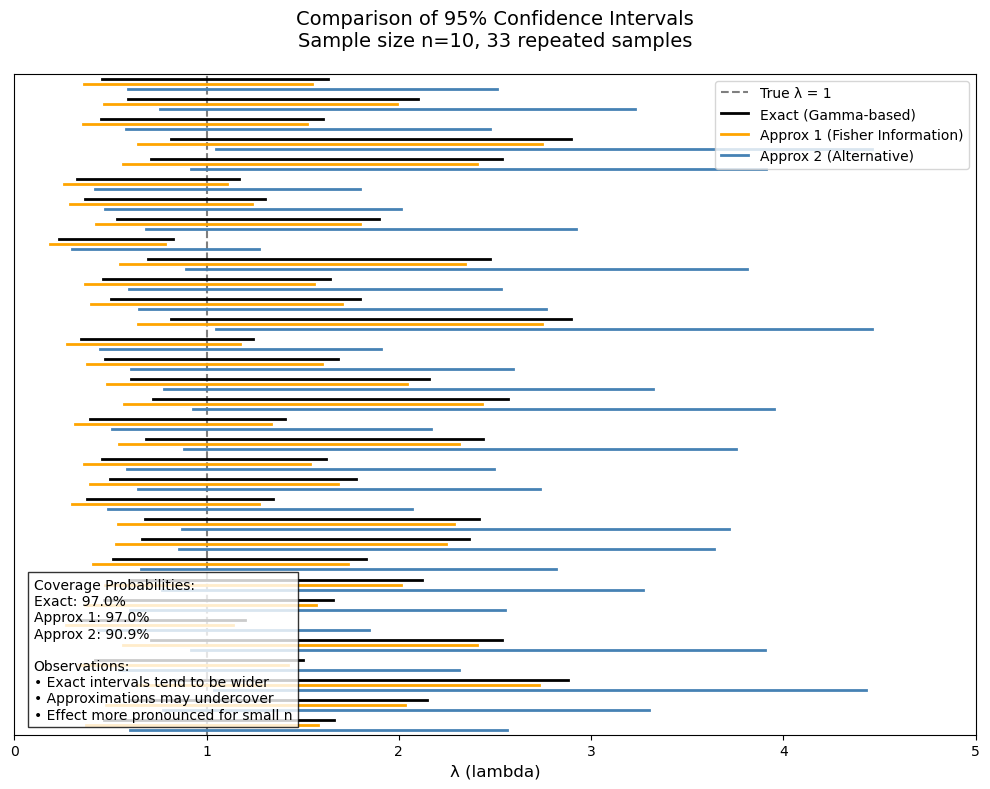


Summary for n = 10:
Average interval widths:
Exact: 1.380
Approx1: 1.392
Approx2: 2.261


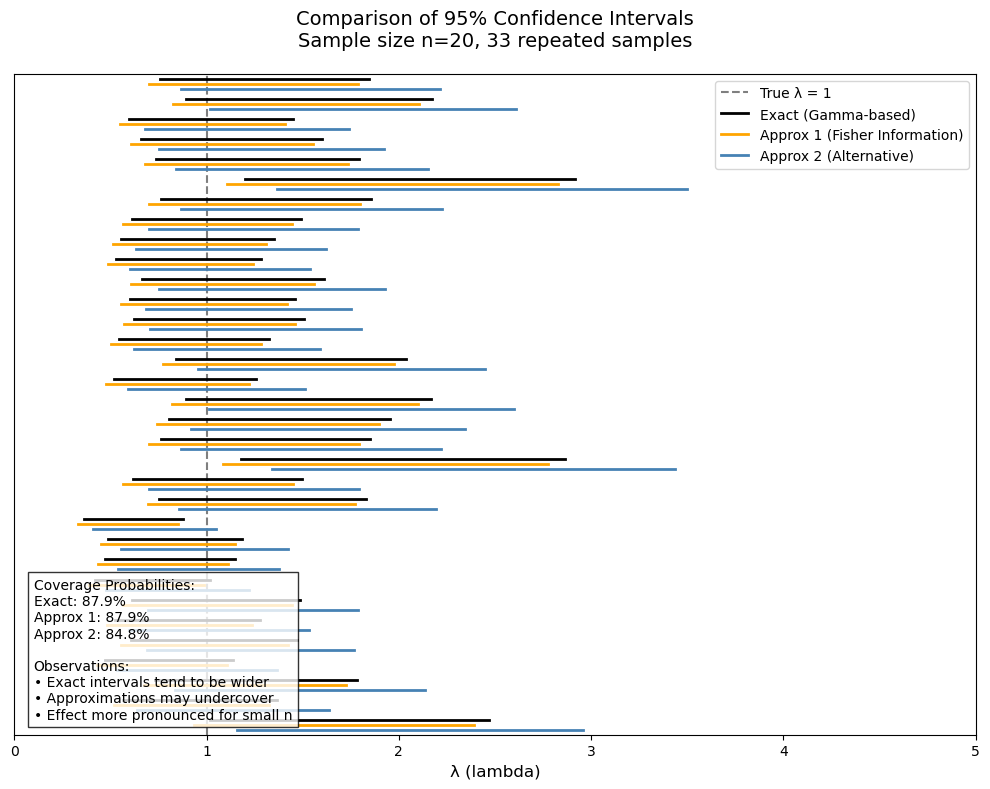


Summary for n = 20:
Average interval widths:
Exact: 0.968
Approx1: 0.973
Approx2: 1.204


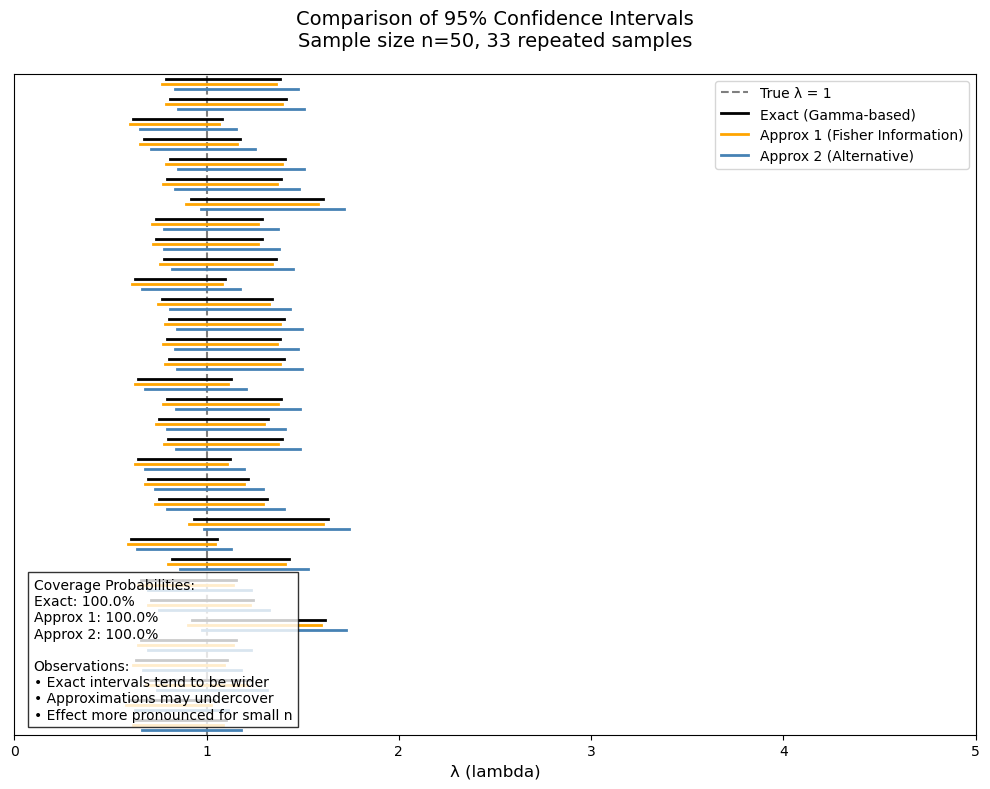


Summary for n = 50:
Average interval widths:
Exact: 0.552
Approx1: 0.553
Approx2: 0.599


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def generate_confidence_intervals(n, m, true_lambda=1):
    """
    Generate and compare three types of confidence intervals for exponential distribution parameter.
    
    Parameters:
    n (int): Sample size for each experiment
    m (int): Number of experiments to run
    true_lambda (float): True parameter value of the exponential distribution
    
    Returns:
    tuple: Lists of confidence intervals for each method
    """
    # Initialize lists to store confidence intervals
    intervals_exact = []
    intervals_approx1 = []
    intervals_approx2 = []
    
    # Calculate gamma distribution quantiles (these are constant for given n)
    a = stats.gamma.ppf(0.025, n)
    b = stats.gamma.ppf(0.975, n)
    
    # Generate m samples and calculate intervals
    for _ in range(m):
        # Generate exponential sample
        x = np.random.exponential(scale=1/true_lambda, size=n)
        x_mean = np.mean(x)
        x_sum = np.sum(x)
        
        # Method 1: Exact interval using gamma distribution
        ci1 = np.array([a, b]) / x_sum
        
        # Method 2: First approximation using Fisher information
        ci2 = np.array([1 - 1.96/np.sqrt(n), 1 + 1.96/np.sqrt(n)]) / x_mean
        
        # Method 3: Second approximation
        ci3 = np.array([1/(1 + 1.96/np.sqrt(n)), 1/(1 - 1.96/np.sqrt(n))]) / x_mean
        
        intervals_exact.append(ci1)
        intervals_approx1.append(ci2)
        intervals_approx2.append(ci3)
    
    return intervals_exact, intervals_approx1, intervals_approx2

def plot_confidence_intervals(n, m, intervals_exact, intervals_approx1, intervals_approx2):
    """
    Create an educational plot showing the comparison of confidence intervals.
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Set up the plot
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 4*m)
    ax.set_xlabel('λ (lambda)', fontsize=12)
    ax.set_yticks([])
    
    # Add title with educational context
    title = f"Comparison of 95% Confidence Intervals\nSample size n={n}, {m} repeated samples"
    ax.set_title(title, fontsize=14, pad=20)
    
    # Add vertical line for true parameter value
    ax.axvline(x=1, color='black', linestyle='--', alpha=0.5, label='True λ = 1')
    
    # Plot confidence intervals
    for i in range(m):
        # Exact interval (black)
        ax.plot(intervals_exact[i], [4*i + 3, 4*i + 3], 'k-', linewidth=2)
        
        # Approximation 1 (orange)
        ax.plot(intervals_approx1[i], [4*i + 2, 4*i + 2], '-', 
                color='orange', linewidth=2)
        
        # Approximation 2 (blue)
        ax.plot(intervals_approx2[i], [4*i + 1, 4*i + 1], '-', 
                color='steelblue', linewidth=2)
    
    # Add legend
    ax.legend(['True λ = 1',
              'Exact (Gamma-based)',
              'Approx 1 (Fisher Information)',
              'Approx 2 (Alternative)'],
             loc='upper right', bbox_to_anchor=(1, 1))
    
    # Add explanatory text
    coverage_exact = calculate_coverage(intervals_exact, 1)
    coverage_approx1 = calculate_coverage(intervals_approx1, 1)
    coverage_approx2 = calculate_coverage(intervals_approx2, 1)
    
    explanation = (
        f"Coverage Probabilities:\n"
        f"Exact: {coverage_exact:.1%}\n"
        f"Approx 1: {coverage_approx1:.1%}\n"
        f"Approx 2: {coverage_approx2:.1%}\n\n"
        "Observations:\n"
        "• Exact intervals tend to be wider\n"
        "• Approximations may undercover\n"
        "• Effect more pronounced for small n"
    )
    
    plt.text(0.02, 0.02, explanation,
             transform=ax.transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             fontsize=10,
             verticalalignment='bottom')
    
    plt.tight_layout()
    return fig

def calculate_coverage(intervals, true_value):
    """Calculate the actual coverage probability of the intervals."""
    coverage = sum(1 for interval in intervals 
                  if interval[0] <= true_value <= interval[1])
    return coverage / len(intervals)

# Example usage and investigation for different sample sizes
def investigate_sample_sizes(sample_sizes=[10, 20, 50], m=33):
    """
    Investigate how the confidence intervals behave for different sample sizes.
    """
    for n in sample_sizes:
        # Generate intervals
        intervals_exact, intervals_approx1, intervals_approx2 = generate_confidence_intervals(n, m)
        
        # Create and save plot
        fig = plot_confidence_intervals(n, m, intervals_exact, intervals_approx1, intervals_approx2)
        plt.show()
        
        # Print summary statistics
        print(f"\nSummary for n = {n}:")
        print("Average interval widths:")
        print(f"Exact: {np.mean([i[1]-i[0] for i in intervals_exact]):.3f}")
        print(f"Approx1: {np.mean([i[1]-i[0] for i in intervals_approx1]):.3f}")
        print(f"Approx2: {np.mean([i[1]-i[0] for i in intervals_approx2]):.3f}")

if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility
    investigate_sample_sizes()

This investigation helps us understand why:

- For small samples, we should prefer the exact (gamma-based) intervals
- The approximations become more reliable as sample size increases
- By n = 62 (as in your earthquake data), all three methods give similar results